In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Roll a fair six-sided dice 'n' times, returning result as an array. 
rng = np.random.default_rng(123123)

def dice_roll(n):
    rints = rng.integers(low=1, high=7, size=n) # Note: high is not included.
    return rints

dice_roll(100)

array([1, 4, 2, 2, 6, 5, 6, 1, 6, 6, 6, 6, 3, 4, 6, 2, 6, 6, 5, 3, 1, 3,
       6, 3, 2, 3, 4, 4, 4, 1, 4, 5, 2, 5, 3, 3, 6, 3, 3, 2, 2, 6, 5, 3,
       1, 4, 4, 3, 3, 2, 2, 4, 2, 5, 2, 4, 6, 5, 4, 3, 3, 5, 3, 2, 2, 4,
       3, 2, 5, 3, 6, 4, 1, 3, 2, 2, 6, 1, 2, 5, 2, 1, 1, 6, 4, 3, 5, 2,
       2, 6, 3, 5, 3, 1, 2, 1, 3, 1, 4, 3])

In [3]:
# See the law of large number at work.

mu = 1/6 * (1+2+3+4+5+6) # Actual mean.
print("Actual mean: " + str(mu))
for i in range(5):
    print("Sample mean: " + str(dice_roll(100000).mean()))

Actual mean: 3.5
Sample mean: 3.51333
Sample mean: 3.50356
Sample mean: 3.50951
Sample mean: 3.49866
Sample mean: 3.49776


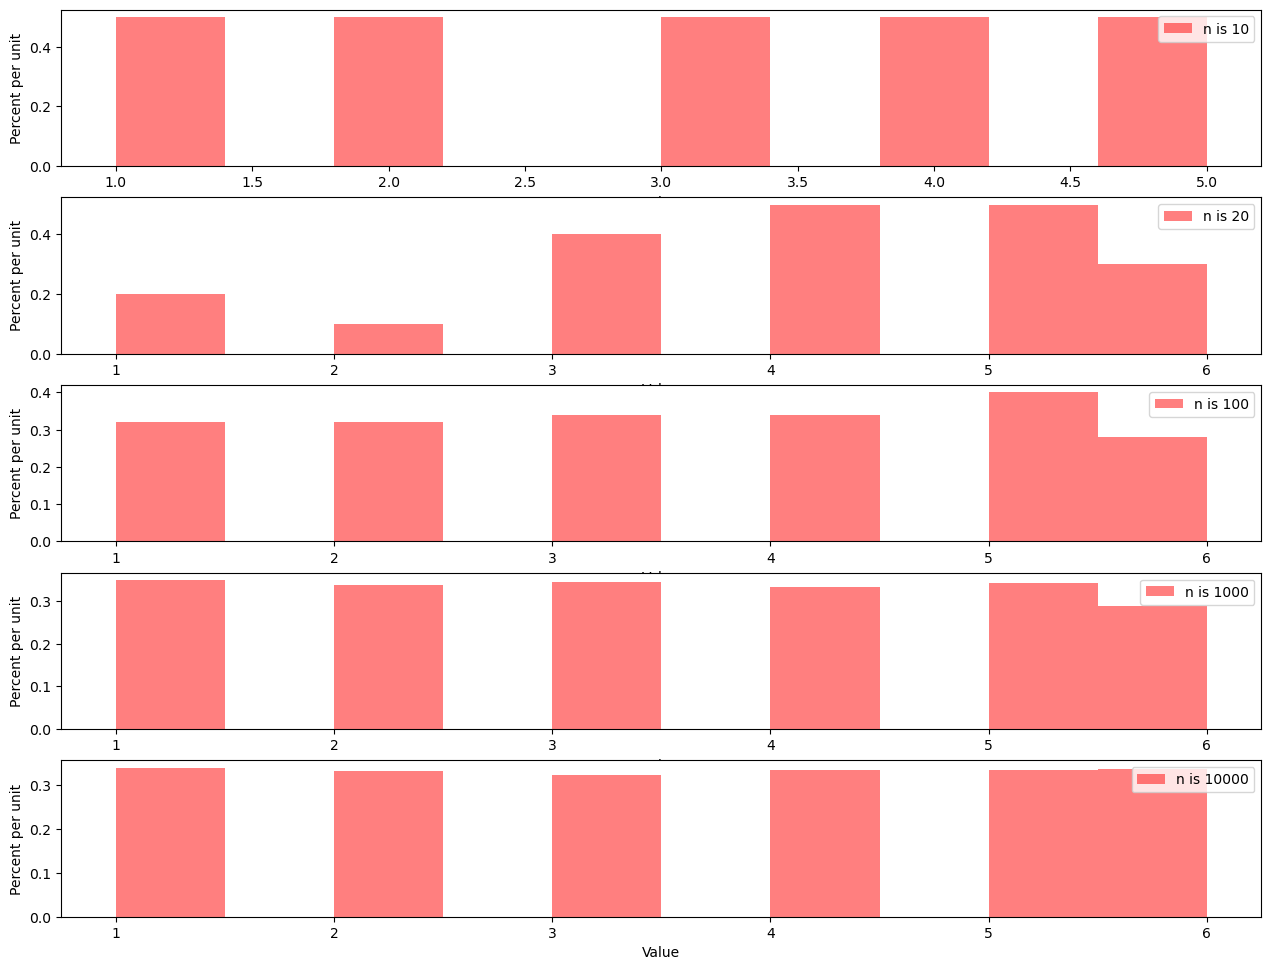

In [4]:
n_values = [10, 20, 100, 1000, 10000]

fig, axes = plt.subplots(len(n_values))
fig.subplots_adjust(top=2, right=2)
for i,n in zip(range(len(n_values)), n_values):
    axes[i].hist(dice_roll(n), color="red", alpha=0.5, label=f"n is {n}", density=True)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Percent per unit")
    axes[i].legend()

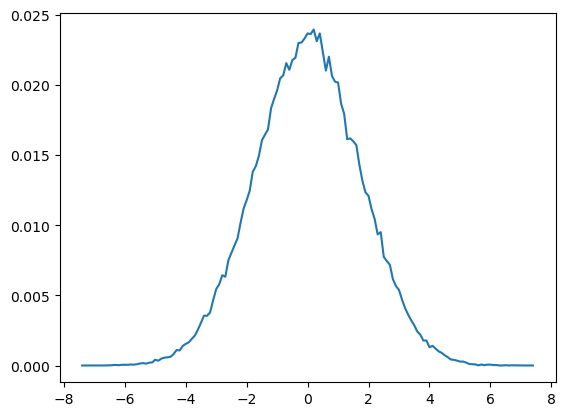

In [12]:
# Simulated verification of CLT.

def unique_values_probabilities(x):
    values, counts = np.unique(x, return_counts=True)
    probs = counts / len(x)
    return values, probs

# sigma2 = 1/6*((1 - 3.5)**2 + (2 - 3.5)**2 + (3 - 3.5)**2 + (4 - 3.5)**2 + (5 - 3.5)**2 + (6 - 3.5)**2) 
mu, sigma = 3.5, math.sqrt(17.5 / 6)

n = 100
number_samples = 100000
d_rolls = [dice_roll(n) for i in range(number_samples)]
sums = [sum(d) for d in d_rolls]
normalized = [(s/n -  mu) * math.sqrt(n) for s in sums]

values, probs = unique_values_probabilities(normalized)

plt.plot(values, probs)

In [14]:
var = (36 - 1.0) / 12
var

2.9166666666666665